# Team

0228903 - Juan Pablo Enríquez Pedroza

0229261 - Ulises Gallardo Rodríguez


# Imports and files read

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
np.set_printoptions(suppress=True)

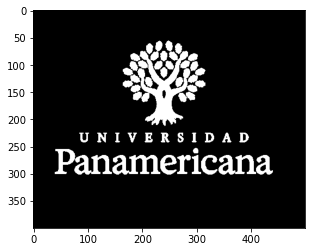

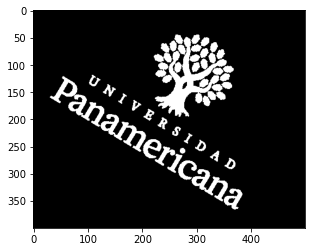

In [2]:
img_obj = cv2.imread('panamericana2.PNG')
img_obj = cv2.cvtColor(img_obj, cv2.COLOR_BGR2GRAY)
img_obj = cv2.bitwise_not(img_obj)
ret, img_obj = cv2.threshold(img_obj,1,255,cv2.THRESH_BINARY)

img_mod = cv2.imread('panamericana1.PNG')
img_mod = cv2.cvtColor(img_mod, cv2.COLOR_BGR2GRAY)
img_mod = cv2.bitwise_not(img_mod)
ret, img_mod = cv2.threshold(img_mod,1,255,cv2.THRESH_BINARY)

modified = np.array(img_mod, dtype=np.uint8)
objective = np.array(img_obj, dtype=np.uint8)
plt.imshow(img_obj, 'gray')
plt.show()
plt.imshow(img_mod, 'gray')
plt.show()


# Functions

In [3]:
def apply_parameters(individual):
    global img_mod
    global img_obj
    rows, cols = img_obj.shape
    
    transform_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),float(individual[2]),individual[3]) #(rotation center, degrees, scale)
    rotate = cv2.warpAffine(img_mod,transform_matrix,(cols,rows)) # (image, transform matrix, image size)

    transform_matrix = np.float32([[1,0,individual[0]],[0,1,individual[1]]]) #Transform matrix: [[1,0,tx],[1,0,ty]]. tx and ty -> Pixels the image will translate. 
    translate = cv2.warpAffine(rotate,transform_matrix,(cols,rows)) # (image, transform matrix, image size)
    
    return translate.copy()

In [4]:
def f(individual):
    a = apply_parameters(individual)
    a[:] = abs(a[:] - img_obj[:])
    ret,new = cv2.threshold(a,1,255,cv2.THRESH_BINARY)
    a[:] = a/255
    return np.sum(a)

In [5]:
def initial_population(n,m = 8, epsilon = 0.0001):
    global img_obj
    rows,cols = img_obj.shape
    population = np.zeros((n,m), dtype = np.float_) # n = populiation size; 8 = parameters
    for i in range(n):
        population[i][0] = np.random.uniform(-cols/10,cols/10)        #tx
        population[i][1] = np.random.uniform(-rows/10,rows/10)        #ty
        population[i][2] = np.random.uniform(-180,180)                #theta 
        population[i][3] = np.random.uniform(0.999,1.0001)            #scale
        population[i][4] = abs(np.random.normal(0,cols/40))           #sigma tx
        population[i][5] = abs(np.random.normal(0,rows/40))           #sigma ty
        population[i][6] = abs(np.random.normal(0,20))                #sigma theta
        population[i][7] = abs(np.random.normal(0,0.0001))            #sigma scale
        for j in range(m):
            if population[i][j] < epsilon:
                population[i][j] = epsilon
    return population

In [6]:
def crossover(A, B):
    child = np.zeros(A.shape,dtype=np.float64)
    for i in range(len(child)):
        child[i] = (A[i] + B[i])/2
    return child

In [7]:
def mutation(individual): 
    dimensions = int(len(individual)/2)
    for i in range(dimensions):
        individual[i] += np.random.normal(0,individual[i + int(len(individual)/2)]) 
        tau = 1/np.sqrt(dimensions)
        individual[i + int(len(individual)/2)] *= np.exp(np.random.normal(0,tau))
    return individual

In [8]:
def best_from_parents_and_offspring(population, flag = False, mu = 1.5):
    n,m = population.shape
    total = int(len(population)* mu)
    offspring = np.zeros([total,m], dtype = np.float64)
    for i in range(total):
        x,y = -1,-1
        while x==y:
            x = np.random.choice(n, size=1)[0]
            y = np.random.choice(n, size=1)[0]
        offspring[i] = crossover(population[x], population[y])
        offspring[i] = mutation(offspring[i])
    
    return np.concatenate((offspring, population)) if flag!=True else offspring

In [9]:
def best_from_offspring(population):
    return best_from_parents_and_offspring(flag = True)

In [10]:
def plot_solution(individual):
    print(individual)
    print(f(individual, img_obj),end="\n\n")
    a = apply_parameters(individual)
    plt.imshow(a , 'gray')
    plt.show()
    a[:] = abs(a[:] - img_obj[:])
    plt.imshow(a , 'gray')
    plt.show()

In [11]:
def survivor(population):
    offspring = best_from_parents_and_offspring(population)
    rows, cols = offspring.shape
    fitness = np.zeros(rows,dtype=np.uint64)
    for i in range(rows):
        fitness[i] = f(offspring[i])
        
    new_population = offspring[np.argsort(fitness)[:len(population)]]
    #print("best")
    #plot_solution(new_population[0])
    return new_population
    

# Algorithm

In [12]:
def evolutive_strategies(n, i=50):
    global img_obj
    population = initial_population(n)
    while i:
        population = survivor(population)
        i-=1
    print(population[0])
    plt.imshow(img_obj, 'gray')
    plt.title("Objetive")
    plt.show()
    best = f(population[0])
    plt.imshow(apply_parameters(population[0]), 'gray')
    plt.title("Best Result with "+str(best)+" errors")
    plt.show()
    

[-1.37317493 21.60739978 31.07928922  0.99977131  7.82051821  4.59616252
 13.78130084  0.00003942]


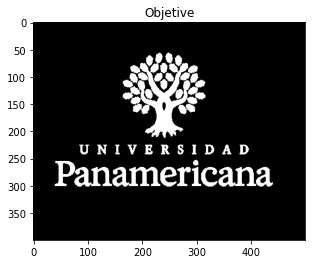

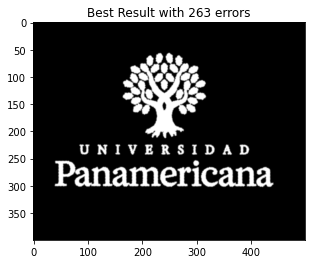

In [13]:
n = 20
evolutive_strategies(n)